# Classificators



In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
gestureNameList = ["forward", "backward", "left", "right", "up", "down", "rotate left", "rotate right", "stop", "land"]

os.chdir("D:\Git\HandGestNotebook\DJI_Tello-Hand-Gesture-Recognition")

In [15]:
gestureNameList[1]

'backward'

In [3]:
handDF = pd.read_pickle("OtherDataset.pickle")
handDF = handDF.dropna(axis='columns')
handDF.isnull().sum().sum()
handDF_cpy = handDF.copy()

In [4]:
train,test = train_test_split(handDF_cpy,test_size = 0.2)

In [5]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = train["IdGesture"]
y_test = test["IdGesture"]
for i in range (21):
    X_train[str(i)+"x"] = train[str(i)+"x"]
    X_train[str(i)+"y"] = train[str(i)+"y"]
    X_test[str(i)+"x"] = test[str(i)+"x"]
    X_test[str(i)+"y"] = test[str(i)+"y"]

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_test,y_test)


DecisionTreeClassifier(random_state=0)

4
3257    4
Name: IdGesture, dtype: object
[1.         1.25510204 1.3877551  1.36734694 1.20408163 1.35714286
 1.41836735 1.44897959 1.46938776 1.15306122 1.14285714 1.14285714
 1.14285714 0.94897959 0.95918367 0.97959184 1.         0.74489796
 0.7755102  0.81632653 0.83673469] [1.         0.91984733 0.80152672 0.67938931 0.61450382 0.69847328
 0.55725191 0.46564885 0.38167939 0.70229008 0.6221374  0.72900763
 0.82061069 0.72137405 0.66030534 0.77099237 0.85496183 0.7519084
 0.6870229  0.76717557 0.83587786]


Text(0.5, 1.0, 'Gestul pentru up')

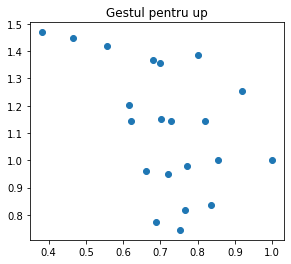

In [11]:
fortest = X_test.sample(1)
toValidate = y_test[fortest.index]
topredict = clf.predict(fortest)[0]
print(topredict)
print(toValidate)


values = fortest.values[0]
x_vals = values[0::2] / values[0]
y_vals = values[1::2] / values[1]

print(x_vals, y_vals)

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)

ax1.scatter(y_vals,x_vals)
ax1.set_title(f"Gestul pentru {gestureNameList[int(topredict)]}")

In [21]:

yhat_test = clf.predict(X_test)

acc = accuracy_score(y_test, yhat_test)

print(acc)

1.0


In [22]:
fortest = X_test.sample(1)
print(fortest)

       0x   0y        1x        1y        2x        2y        3x        3y  \
3741  1.0  1.0  1.265306  0.903448  1.377551  0.768966  1.326531  0.634483   

            4x        4y  ...       16x       16y       17x       17y  \
3741  1.091837  0.558621  ...  0.928571  0.827586  0.642857  0.737931   

           18x      18y       19x       19y       20x       20y  
3741  0.612245  0.67931  0.693878  0.762069  0.744898  0.834483  

[1 rows x 42 columns]


# Neural Networks

In [47]:
import pickle as pkl
with open("OtherDataset.pickle", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'OtherDataset.csv')

In [48]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [49]:
dataset = 'OtherDataset.csv'
model_save_path = 'keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'keypoint_classifier/keypoint_classifier.tflite'
NUM_CLASSES = 10

In [50]:
handDataFrame = pd.read_pickle("OtherDataset.pickle")
handDataFrame = handDF.dropna(axis='columns')
train,test = train_test_split(handDF_cpy,test_size = 0.2)


X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(2, (21 * 2) + 2)))


y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(1))




In [80]:
X_trainNeural, X_testNeural, y_trainNeural, y_testNeural = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=42)

In [81]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = train["IdGesture"]
y_test = test["IdGesture"]
for i in range (21):
    X_train[str(i)+"x"] = train[str(i)+"x"]
    X_train[str(i)+"y"] = train[str(i)+"y"]
    X_test[str(i)+"x"] = test[str(i)+"x"]
    X_test[str(i)+"y"] = test[str(i)+"y"]

In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [83]:

# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)



In [84]:


# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [85]:

history = model.fit(
    X_trainNeural,
    y_trainNeural,
    epochs=11,
    batch_size=64,
    validation_data=(X_testNeural, y_testNeural),
    callbacks=[cp_callback, es_callback]
)


Epoch 1/11
 97/136 [====================>.........] - ETA: 0s - loss: 2.1498 - accuracy: 0.2608   
Epoch 1: val_loss improved from inf to 1.61051, saving model to keypoint_classifier\keypoint_classifier.hdf5
136/136 [==============================] - 1s 2ms/step - loss: 2.0414 - accuracy: 0.3080 - val_loss: 1.6105 - val_accuracy: 0.5153
Epoch 2/11
124/136 [==========================>...] - ETA: 0s - loss: 1.1787 - accuracy: 0.5866
Epoch 2: val_loss improved from 1.61051 to 0.72875, saving model to keypoint_classifier\keypoint_classifier.hdf5
136/136 [==============================] - 0s 2ms/step - loss: 1.1453 - accuracy: 0.5992 - val_loss: 0.7287 - val_accuracy: 0.7669
Epoch 3/11
103/136 [=====================>........] - ETA: 0s - loss: 0.5617 - accuracy: 0.9008
Epoch 3: val_loss improved from 0.72875 to 0.36609, saving model to keypoint_classifier\keypoint_classifier.hdf5
136/136 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.9144 - val_loss: 0.3661 - va

In [86]:
# summarize history for accuracy
def plot_model_acuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


# summarize history for loss
def plot_model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

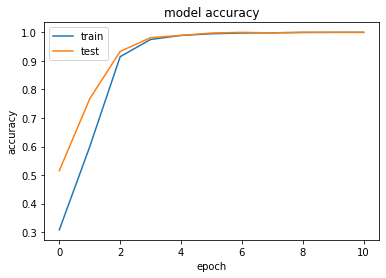

In [87]:
plot_model_acuracy(history)

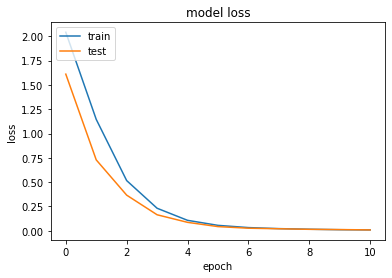

In [88]:
plot_model_loss(history)

In [89]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [90]:
val_loss, val_acc = model.evaluate(X_testNeural, y_testNeural, batch_size=64)

34/34 [==============================] - 0s 818us/step - loss: 0.0085 - accuracy: 0.9995


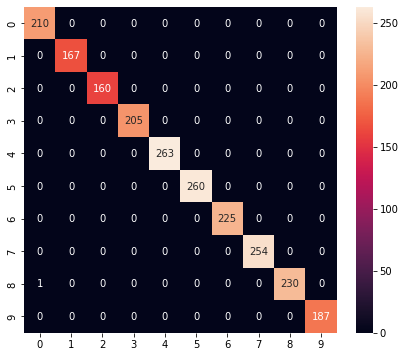

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00       205
           4       1.00      1.00      1.00       263
           5       1.00      1.00      1.00       260
           6       1.00      1.00      1.00       225
           7       1.00      1.00      1.00       254
           8       1.00      1.00      1.00       231
           9       1.00      1.00      1.00       187

    accuracy                           1.00      2162
   macro avg       1.00      1.00      1.00      2162
weighted avg       1.00      1.00      1.00      2162



In [91]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_testNeural, y_pred))

Y_pred = model.predict(X_testNeural)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_testNeural, y_pred)

# Recognising with a classificator

In [92]:
import mediapipe as mp
import cv2 
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

handData = {'0x':[],'0y':[], '1x':[], '1y':[], '2x':[], '2y':[], '3x':[],'3y':[], '4x':[], '4y':[], '5x':[ ], '5y':[], '6x':[ ], '6y':[], '7x':[ ], '7y':[], '8x':[ ], '8y':[], '9x':[ ],
                '9y':[], '10x':[ ], '10y':[], '11x':[ ], '11y':[], '12x':[ ], '12y':[], '13x':[ ], '13y':[], '14x':[ ], '14y':[], '15x':[ ], '15y':[], '16x':[ ], '16y':[], 
                '17x':[ ], '17y':[], '18x':[ ], '18y':[], '19x':[ ], '19y':[], '20x':[ ], '20y':[]}
# handData = pd.DataFrame()


In [93]:
def checkPointsRange(handLandmarks, w, h):
    for landmarks in handLandmarks:
        cx, cy = int ( landmarks.x * w ), int ( landmarks.y * h )
        if cx not in range(0,w) or cy not in range(0,h):
            return True
    return False



def setDataFramePoints(fingerLandmark, w, h):
    x0_point = int(fingerLandmark[0].x * w)
    y0_point = int(fingerLandmark[0].y * h)
    for i in range(0,21):
        cx = int(fingerLandmark[i].x * w) / x0_point
        cy = int(fingerLandmark[i].y * h) / y0_point
        handData[str(i) + 'x'] = cx
        handData[str(i) + 'y'] = cy
    dataFrame = X_test.sample(1)
    dataFrame = pd.DataFrame([handData])
    return dataFrame

def show_whatGest_isThis(dF):
    gesture = clf.predict(dF)[0]
    return gestureNameList[int(gesture)]

In [96]:

def RunProgram():
    cap = cv2.VideoCapture(0)

    mpHands = mp.solutions.hands
    hands = mpHands.Hands( max_num_hands=1, min_detection_confidence=0.9, static_image_mode=False)
    mpDraw = mp.solutions.drawing_utils

    while True:
        success, img = cap.read()
        img = cv2.flip(img,1)
        results = hands.process(img)
        h, w, c = img.shape
        cv2.rectangle(img, (20,20), (300,400), (255,0,0), 2)
        if results.multi_hand_landmarks:
            for handLms in results.multi_hand_landmarks:
                for id, lm in enumerate(handLms.landmark):
                    cx, cy = int(lm.x * w), int(lm.y * h)

                landMarkVect = handLms.landmark

                if(not checkPointsRange(landMarkVect,w,h)):
                    dF = setDataFramePoints(landMarkVect, w, h)
                    # print(dF)
                    gestureName = show_whatGest_isThis(dF)

                mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)
                cv2.putText(img, gestureName, (10, 70), cv2.FONT_ITALIC, 1, (0, 0, 255), 1)

        cv2.imshow("Image", img)
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            cv2.destroyAllWindows()
            break

In [97]:
RunProgram()